Import required libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import datatable as dt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.simplefilter("ignore")

Dataset

In [2]:
datatable_df = dt.fread("household_power_consumption.txt")

In [3]:
df = datatable_df.to_pandas()

EDA

In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.400000000000002,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.3740000000000005,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [6]:
df.shape

(2075259, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.drop(['Time'], axis = 1, inplace = True)

In [14]:
df.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,4.216,0.418,234.84,18.400000000000002,0.0,1.0,17.0
1,2006-12-16,5.36,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,5.3740000000000005,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [15]:
df.isnull().sum()

Date                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [16]:
df.duplicated().sum()

51279

In [17]:
df.drop_duplicates(inplace = True)

In [19]:
df['Sub_metering_1'].unique()

array(['0.0', '1.0', '2.0', '6.0', '37.0', '36.0', '38.0', '25.0', '12.0',
       '11.0', '9.0', '4.0', '33.0', '5.0', '34.0', '8.0', '26.0', '27.0',
       '15.0', '20.0', '21.0', '23.0', '16.0', '0.000', '1.000', '2.000',
       '10.000', '38.000', '37.000', '39.000', '32.000', '5.000',
       '27.000', '?', '19.000', '35.000', '20.000', '30.000', '9.000',
       '26.000', '34.000', '33.000', '40.000', '12.000', '7.000',
       '36.000', '15.000', '31.000', '23.000', '6.000', '16.000',
       '17.000', '21.000', '25.000', '3.000', '4.000', '11.000', '29.000',
       '24.000', '14.000', '41.000', '53.000', '76.000', '75.000',
       '77.000', '74.000', '8.000', '28.000', '68.000', '58.000',
       '62.000', '13.000', '18.000', '22.000', '64.000', '71.000',
       '56.000', '72.000', '45.000', '42.000', '59.000', '66.000',
       '43.000', '44.000', '48.000', '46.000', '73.000', '55.000',
       '60.000', '70.000', '63.000', '67.000', '47.000', '65.000',
       '51.000', '50.000', '69.

In [20]:
df.replace('?', np.nan, inplace=True)

In [23]:
df.isnull().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [22]:
df = df.loc[df['Global_active_power'] != 'Global_active_power']
df = df.loc[df['Global_active_power'].isnull()==False]
df = df.reset_index(drop = True)

In [24]:
df.isnull().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [25]:
conversion = {'Global_active_power' : 'float64', 'Global_reactive_power'  : 'float64', 'Voltage' : 'float64',
       'Global_intensity' : 'float64', 'Sub_metering_1' : 'float64', 'Sub_metering_2' : 'float64',
       'Sub_metering_3' : 'float64'}
df = df.astype(conversion)

In [26]:
df= df.groupby('Date').sum()

In [27]:
df.reset_index(inplace = True)

In [28]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month

In [29]:
df.groupby('year').sum()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,month
year,,,,,,,,
2006,41733.912,2886.324,5.283930e+06,176265.8,27421.0,48712.0,162684.0,192
2007,579859.186,60995.168,1.225492e+08,2473456.2,642471.0,853726.0,3014292.0,2378
2008,562481.204,61504.612,1.248743e+08,2388696.2,584579.0,661634.0,3165882.0,2384
2009,560548.378,68375.832,1.250668e+08,2367287.8,592569.0,591917.0,3545605.0,2376
2010,483855.874,59087.760,1.096481e+08,2042471.2,451672.0,503577.0,3302211.0,1981


In [30]:
df.groupby('month').sum()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year
month,,,,,,,,
1,233347.082,20094.828,41741926.15,983329.2,248756.0,231450.0,1299036.0,245034
2,175994.092,17214.986,38190663.59,741453.2,143781.0,204929.0,1025424.0,224950
3,203101.424,20624.064,41764853.33,857100.0,217617.0,260557.0,1201350.0,247044
4,173955.958,20766.068,39916800.72,737872.2,162208.0,232971.0,1049985.0,237003
5,186338.862,22719.370,42033209.21,795663.6,220349.0,241934.0,1167164.0,247044
6,161081.054,23865.022,39910685.29,691107.8,203736.0,209867.0,1025197.0,237001
7,143873.776,23583.740,41857331.02,620171.2,145132.0,191723.0,856936.0,247044
8,140955.682,22985.052,39734248.97,605200.0,159565.0,187162.0,891974.0,239004
9,170970.914,21219.076,39555177.02,727487.2,183377.0,203944.0,1073951.0,234990


In [31]:
df.shape

(1433, 10)

In [32]:
df = df[df['Date']>'2006-12-31']

In [33]:
df.shape

(1417, 10)

In [34]:
df.isnull().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
month                    0
dtype: int64

In [35]:
a = (df['Global_active_power']*1000/60)
b = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['power_consumption'] = a - b
df.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,power_consumption
16,2007-01-01,2717.382,148.072,341925.82,11270.8,0.0,352.0,5863.0,2007,1,39074.700000
17,2007-01-02,1816.918,149.828,340586.66,7645.4,1170.0,386.0,13109.0,2007,1,15616.966667
18,2007-01-03,489.322,106.762,319252.84,2064.2,0.0,314.0,1945.0,2007,1,5896.366667
19,2007-01-04,2781.346,202.372,344423.08,11716.2,4629.0,5400.0,19455.0,2007,1,16871.766667
20,2007-01-05,1662.766,181.534,336039.89,7300.6,4005.0,995.0,8546.0,2007,1,14166.766667


In [36]:
df['Sub_metering']=df['Sub_metering_1']+df['Sub_metering_2']+df['Sub_metering_3']

In [37]:
df = df.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1)

In [41]:
df.head(10)

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,power_consumption,Sub_metering
16,2007-01-01,2717.382,148.072,341925.82,11270.8,2007,1,39074.700000,6215.0
17,2007-01-02,1816.918,149.828,340586.66,7645.4,2007,1,15616.966667,14665.0
18,2007-01-03,489.322,106.762,319252.84,2064.2,2007,1,5896.366667,2259.0
19,2007-01-04,2781.346,202.372,344423.08,11716.2,2007,1,16871.766667,29484.0
20,2007-01-05,1662.766,181.534,336039.89,7300.6,2007,1,14166.766667,13546.0
21,2007-01-06,1036.148,142.340,332971.45,4475.0,2007,1,9173.133333,8096.0
22,2007-01-07,1020.782,172.054,342082.89,4411.6,2007,1,10638.033333,6375.0
23,2007-01-08,1055.250,141.692,325193.47,4594.8,2007,1,6192.500000,11395.0
24,2007-01-09,1696.994,288.962,340356.54,7275.6,2007,1,15484.233333,12799.0
25,2007-01-10,1716.926,146.166,342099.44,7289.4,2007,1,14545.433333,14070.0


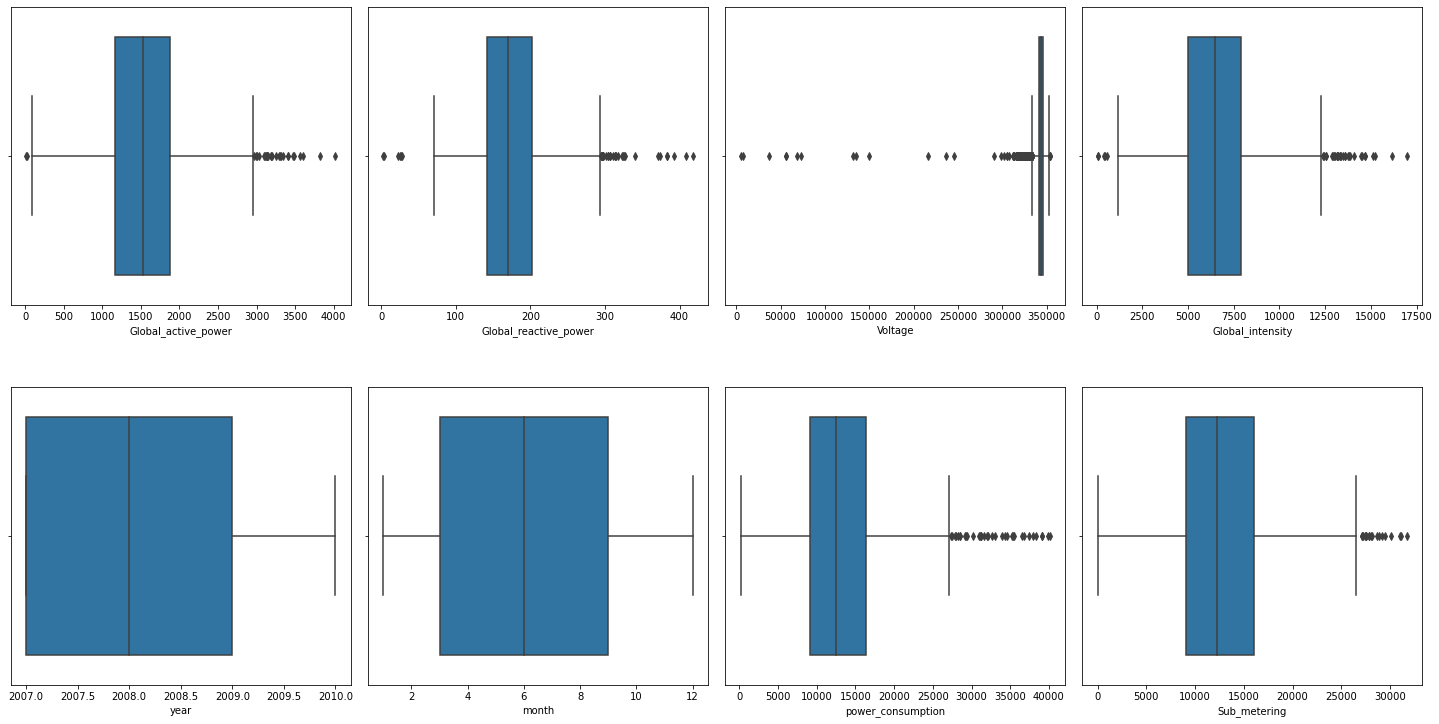

In [42]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
  if col!='Date':
    sns.boxplot(x = col, data = df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [43]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR*distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR*distance)
    return upper_boundary, lower_boundary

In [44]:
outliers_columns = ['Global_active_power', 'Global_reactive_power','Voltage','Global_intensity','power_consumption','Sub_metering']
for i in outliers_columns:
    upper_boundary, lower_boundary = find_boundaries(df,i, 1.5)
    outliers = np.where(df[i] > upper_boundary, True, np.where(df[i] < lower_boundary, True, False))
    outliers_df = df.loc[outliers, i]
    df_trimed= df.loc[~outliers, i]
    df[i] = df_trimed

In [45]:
df.isnull().sum()

Date                       0
Global_active_power       30
Global_reactive_power     38
Voltage                  149
Global_intensity          35
year                       0
month                      0
power_consumption         35
Sub_metering              19
dtype: int64

In [46]:
df.fillna(df.median().round(1), inplace=True)

In [47]:
df.dropna(inplace = True)

In [48]:
df.isnull().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
year                     0
month                    0
power_consumption        0
Sub_metering             0
dtype: int64

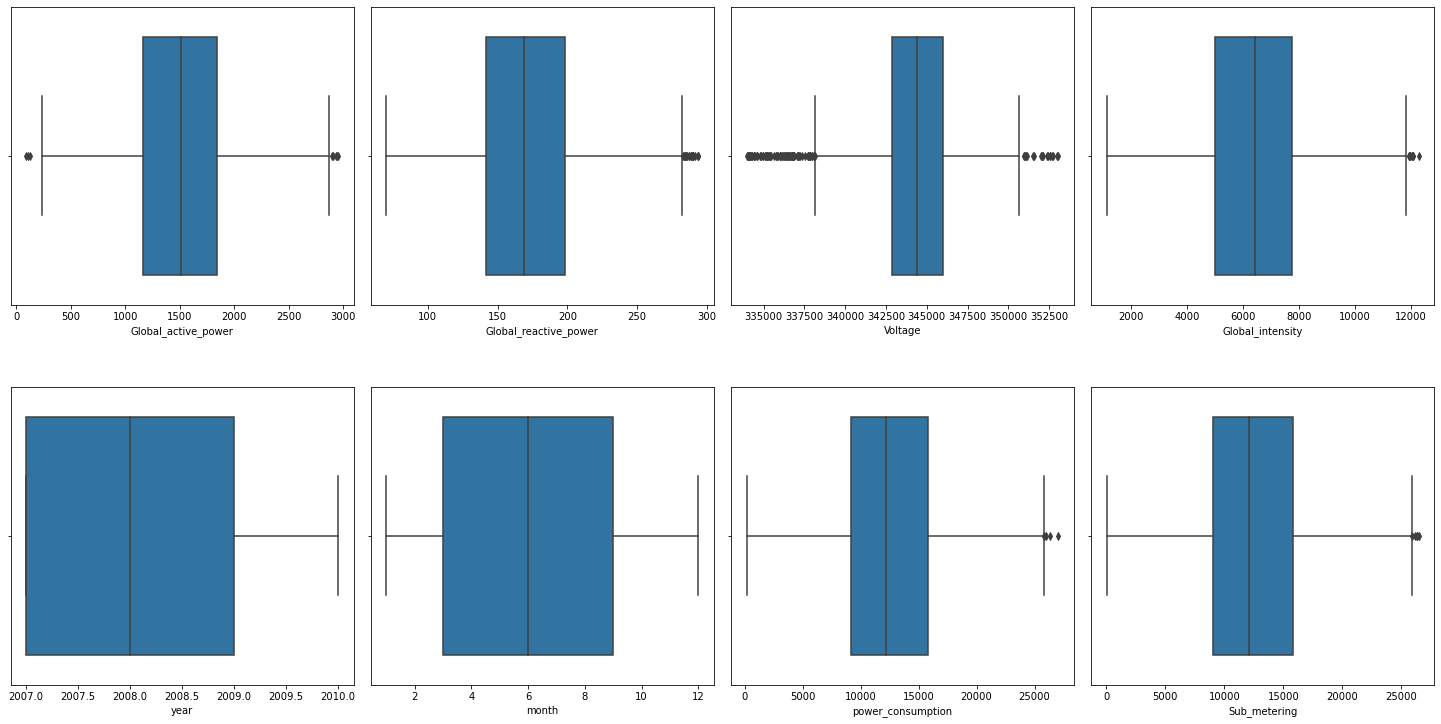

In [49]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col!='Date':
        sns.boxplot(x = col, data = df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

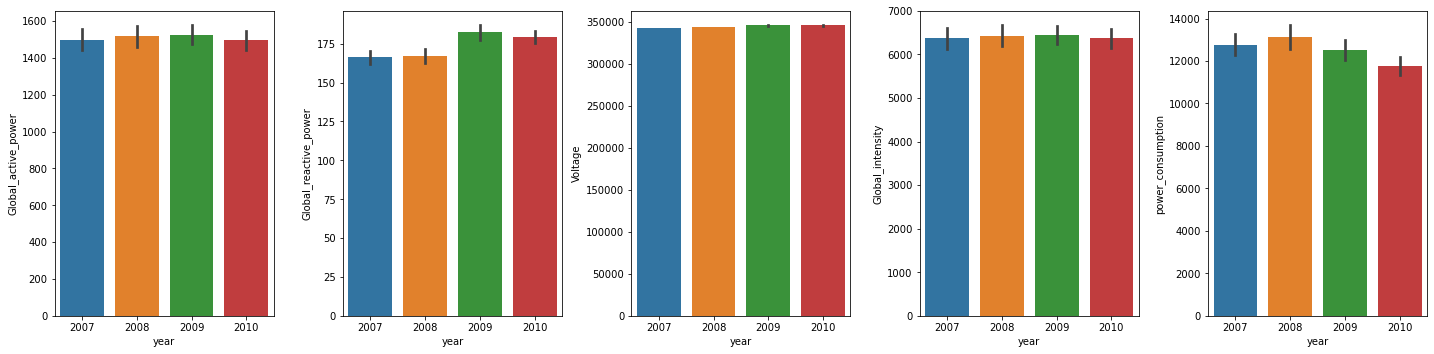

In [50]:
fig, ax = plt.subplots(ncols = 5, nrows = 1, figsize=(20,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col not in ['Date', 'year', 'month']:
        sns.barplot(y = df[col], x = df['year'], data = df, ax=ax[index] )
        index += 1 
    if index == 5:
        break 
plt.tight_layout(pad=1, w_pad=1, h_pad=10.0)

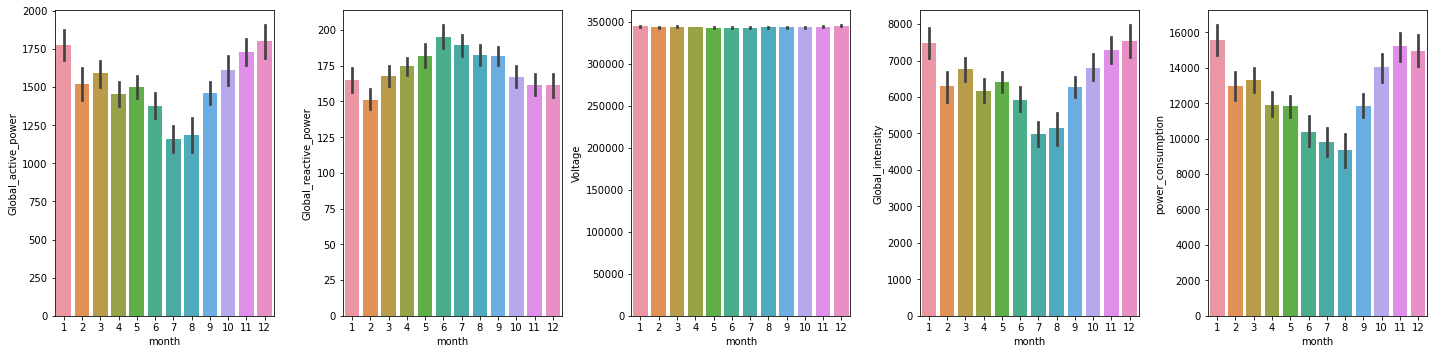

In [51]:
fig, ax = plt.subplots(ncols = 5, nrows = 1, figsize=(20,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col not in ['Date', 'year', 'month']:
        sns.barplot(y = df[col], x = df['month'], data = df, ax=ax[index] )
        index += 1 
    if index == 5:
        break 
plt.tight_layout(pad=1, w_pad=1, h_pad=10.0)

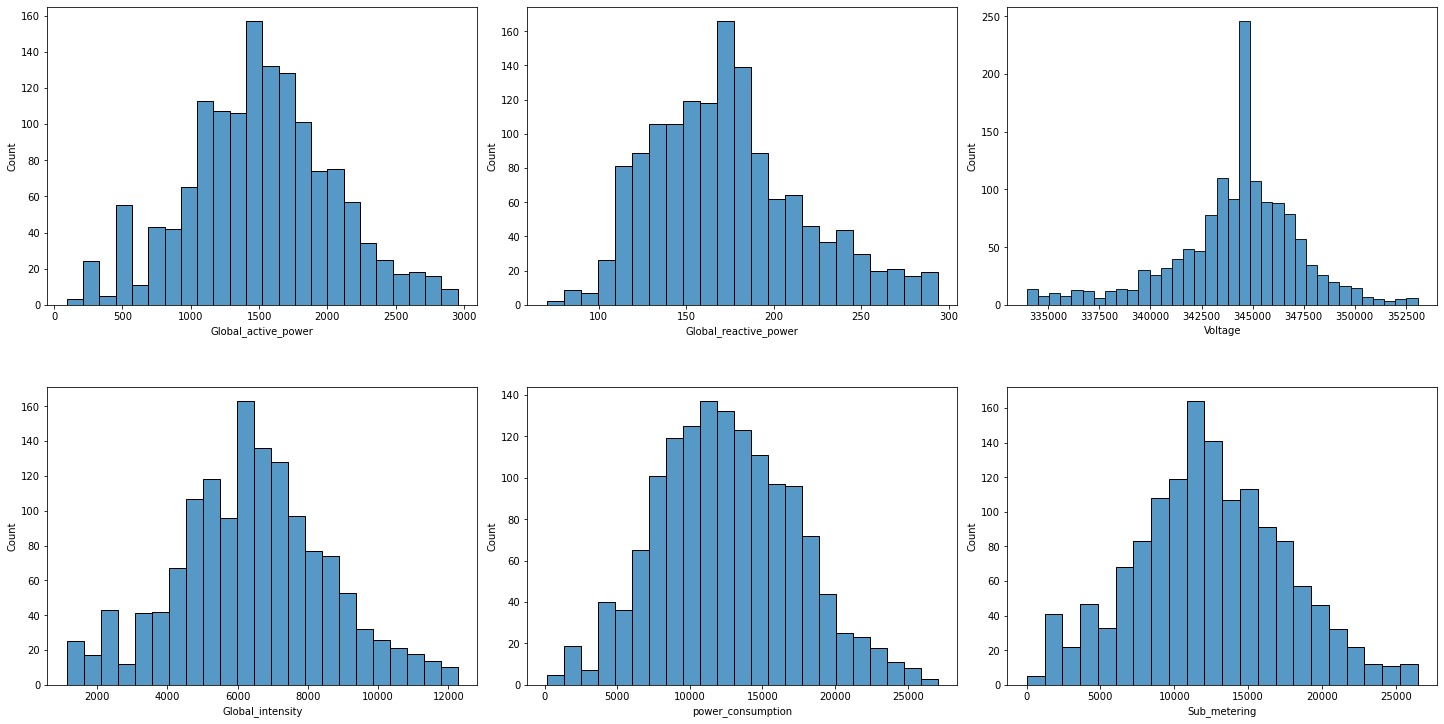

In [52]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col not in ['Date', 'year', 'month']:
        sns.histplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


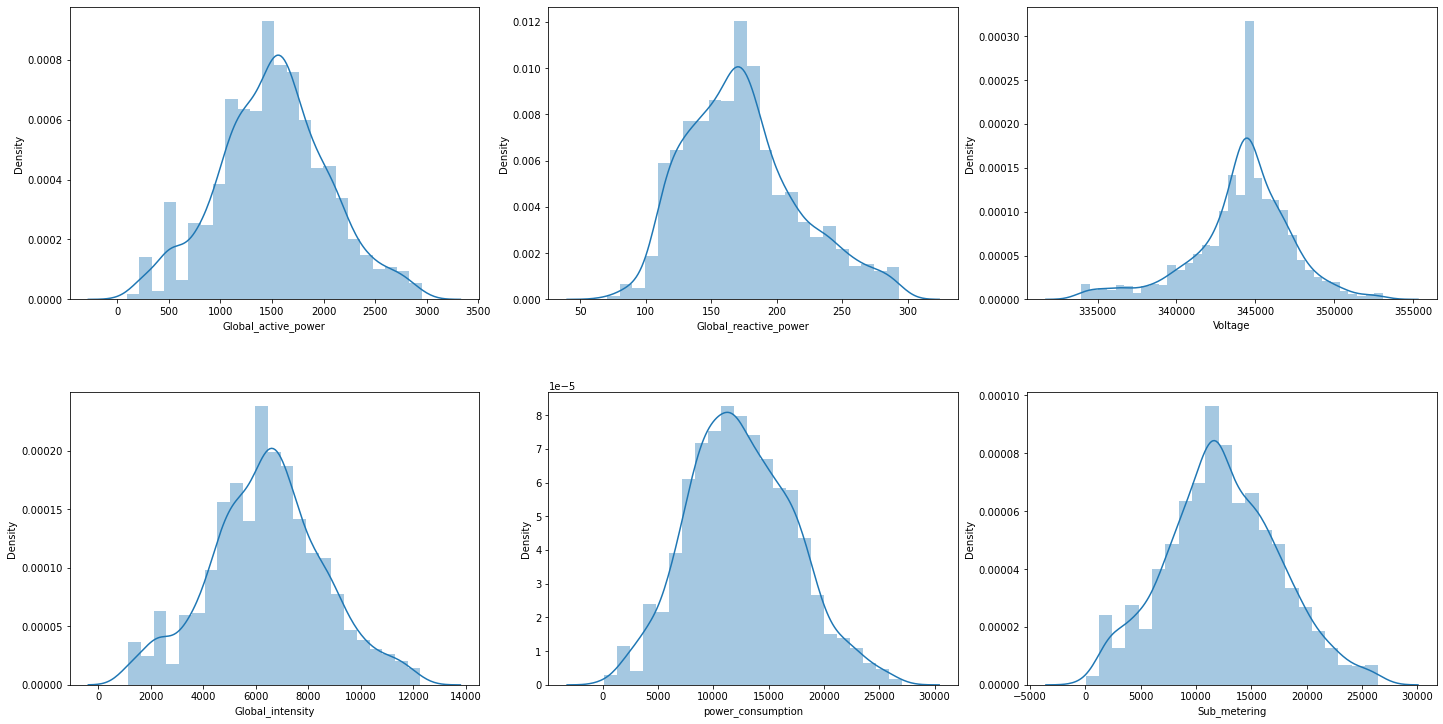

In [53]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col not in ['Date', 'year', 'month']:
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Observation 
1) Power consumption in November and January are on higher side.
2) Voltage is almost equal in every month.

Statistical Analysis

<AxesSubplot:>

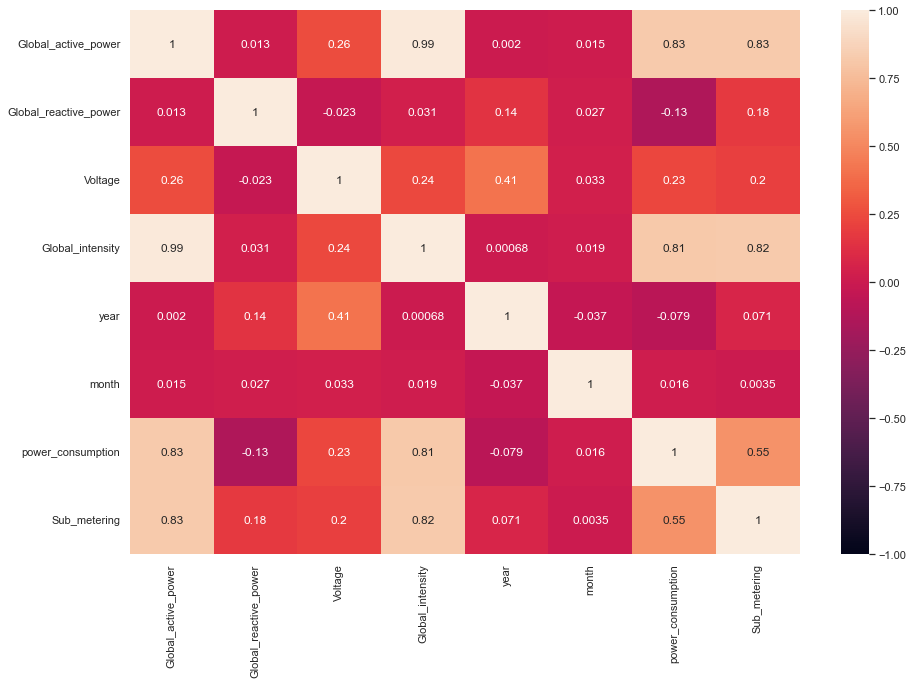

In [56]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=df.corr(), annot=True,  vmin=-1, vmax=1)

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,1417.0,1510.459660,534.219992,93.338000,1160.098000,1515.4,1843.762000,2952.772000
Global_reactive_power,1417.0,173.499832,43.190926,70.262000,141.616000,169.2,198.096000,293.798000
Voltage,1417.0,344136.690805,3168.731539,333953.470000,342854.430000,344425.9,345998.720000,353071.440000
Global_intensity,1417.0,6410.296260,2174.158123,1139.600000,5011.600000,6441.4,7762.200000,12262.400000
year,1417.0,2008.455893,1.103888,2007.000000,2007.000000,2008.0,2009.000000,2010.000000
month,1417.0,6.435427,3.415065,1.000000,3.000000,6.0,9.000000,12.000000
power_consumption,1417.0,12568.312256,4778.856968,152.966667,9173.133333,12224.9,15821.333333,27063.866667
Sub_metering,1417.0,12418.352858,5091.302749,18.000000,9050.000000,12116.0,15804.000000,26468.000000


Observation 
1) Maximum power consumption in a day is 2146 w/h.
2) Average consumption is 631 w/h.
3) Minimum cosmption is 21 w/h.

Segregating Independent and Dependent Features

In [58]:
X = df.iloc[ : , [1,2,3,4,6,8]]
y = df.iloc[ : , -2]

In [59]:
X.shape

(1417, 6)

In [60]:
y.shape

(1417,)

In [62]:
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,month,Sub_metering
16,2717.382,148.072,341925.82,11270.8,1,6215.0
17,1816.918,149.828,340586.66,7645.4,1,14665.0
18,489.322,106.762,344425.90,2064.2,1,2259.0
19,2781.346,202.372,344423.08,11716.2,1,12116.0
20,1662.766,181.534,336039.89,7300.6,1,13546.0


In [63]:
y.head()

16    12224.900000
17    15616.966667
18     5896.366667
19    16871.766667
20    14166.766667
Name: power_consumption, dtype: float64

Regplot

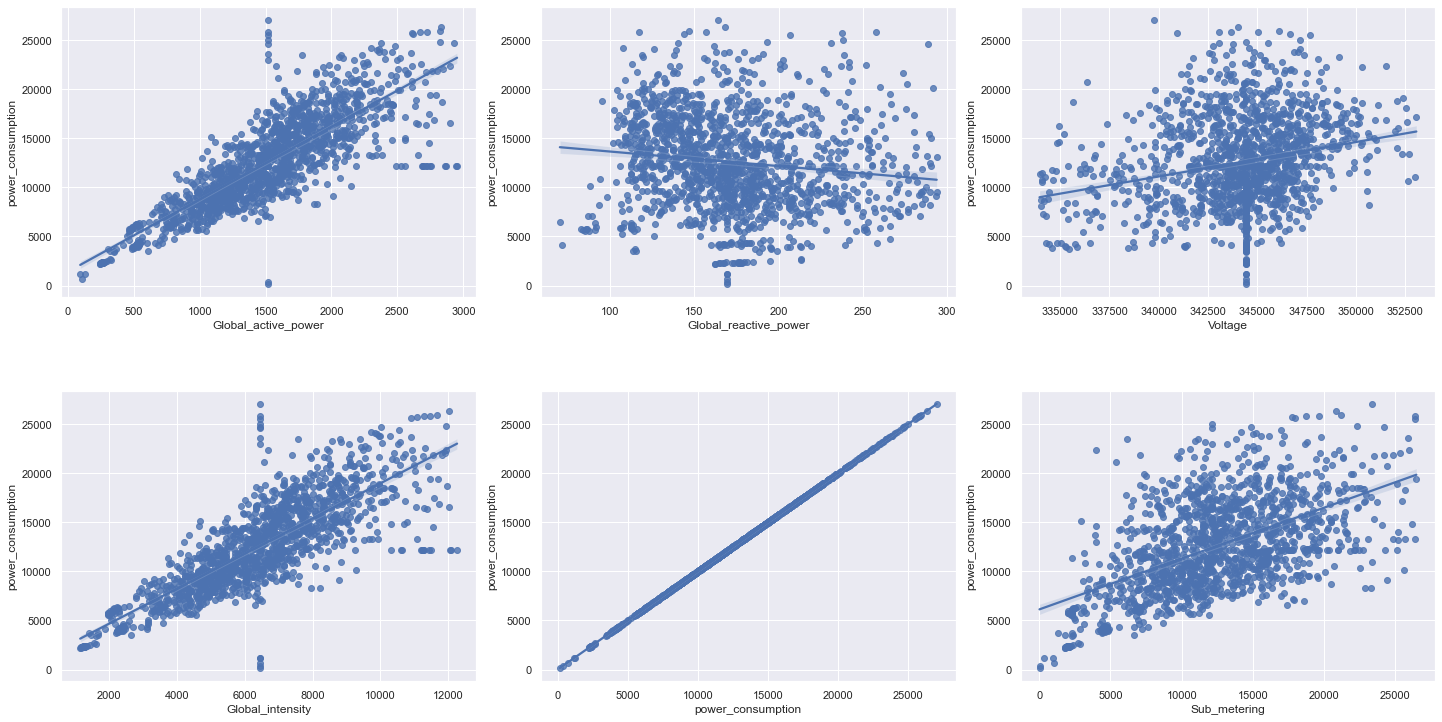

In [64]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col not in ['Date', 'year', 'month']:
        sns.regplot(x = df[col],y = df["power_consumption"], data = df , ax = ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Train Test Split

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.33)

Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [67]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
len(X_train)

949

Save Preprocess Model Data Using Pickle

In [69]:
preprocess_model = [X_train,y_train,X_test,y_test]

In [70]:
import pickle

In [71]:
pickle.dump(preprocess_model, open('preprocess_model.pkl','wb'))

In [72]:
preprocess_model = pickle.load(open('preprocess_model.pkl','rb'))

Save Data into MongoDb

In [73]:
y_train.T

146     21125.233333
184      8113.233333
280     11410.633333
789     15222.933333
1350    18500.600000
            ...     
227     19307.033333
518     14294.100000
553      9547.200000
1236    11733.766667
191      8176.433333
Name: power_consumption, Length: 949, dtype: float64

In [74]:
database_df = pd.DataFrame([X_train.T[0],X_train.T[1],X_train.T[2],X_train.T[3], X_train.T[4], X_train.T[5],y_train]).T

In [75]:
database_df.columns=['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'month', 'Sub_metering', 'power_consumption']

In [76]:
database_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,month,Sub_metering,power_consumption
0,1.204532,0.109462,-0.401150,1.254074,-0.433043,0.455153,21125.233333
1,-1.268356,0.310282,-0.665544,-1.271979,-0.140129,-1.275913,8113.233333
2,-0.184398,1.536581,-2.624588,-0.126907,0.738612,-0.041246,11410.633333
3,0.339640,-1.494546,0.520953,0.292972,-1.311784,0.116969,15222.933333
4,0.969272,-0.440775,-0.958043,1.025785,0.738612,0.564716,18500.600000


In [77]:
l=[]
for i ,row in database_df.iterrows():
    l.append(dict(row))

In [78]:
get_ipython().system('pip install pymongo')

In [79]:
import pymongo
from pymongo import MongoClient

In [80]:
client = pymongo.MongoClient("mongodb://localhost:27017")

In [81]:
db=client['Household_Power_Preprocessed_Data']
collections = db['Training Independent_and_Dependent_Dataset']
collections.insert_many(l)

Load Preprocessed data using Pickle

In [82]:
preprocess_model = pickle.load(open('preprocess_model.pkl','rb'))

In [83]:
X_train = preprocess_model[0]
y_train = preprocess_model[1]
X_test = preprocess_model[2]
y_test = preprocess_model[3]

In [84]:
X_train =pd.DataFrame(X_train)
X_test =pd.DataFrame(X_test)
X_train.columns=['Global_active_power', 'Global_reactive_power', 'Voltage','Global_intensity', 'month', 'Sub_metering']
X_test.columns=['Global_active_power', 'Global_reactive_power', 'Voltage','Global_intensity', 'month','Sub_metering']

VIF Check

In [85]:
X_train2 = X_train.copy()
X_train= pd.DataFrame(X_train)

In [86]:
X_train

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,month,Sub_metering
0,1.204532,0.109462,-0.401150,1.254074,-0.433043,0.455153
1,-1.268356,0.310282,-0.665544,-1.271979,-0.140129,-1.275913
2,-0.184398,1.536581,-2.624588,-0.126907,0.738612,-0.041246
3,0.339640,-1.494546,0.520953,0.292972,-1.311784,0.116969
4,0.969272,-0.440775,-0.958043,1.025785,0.738612,0.564716
...,...,...,...,...,...,...
944,1.375845,0.784690,-0.211476,1.395304,0.445698,1.112930
945,0.557010,1.861743,-0.090361,0.640563,-0.433043,0.679026
946,0.104937,2.790940,-1.219576,0.146353,-0.140129,0.830912
947,0.081369,-0.453575,1.409386,0.016367,-0.433043,0.357455


In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(X_train.columns)
print(vif)

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'month', 'Sub_metering'],
      dtype='object')
[43.95269668992718, 1.1091287610953484, 1.0641576501358463, 41.900897724384244, 1.0034440035736676, 3.297036722214265]


In [88]:
while (max(vif) > 5):    
    indx = vif.index(max(vif)) #Get the index of variable with highest VIF
    print(indx)
    X_train.drop(X_train.columns[indx],axis = 1, inplace = True)
    vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(X_train.columns)
print(vif)

0
Index(['Global_reactive_power', 'Voltage', 'Global_intensity', 'month',
       'Sub_metering'],
      dtype='object')
[1.0721358767724285, 1.0473128867323611, 3.102714971644615, 1.0033630430347547, 3.16026056860505]


In [89]:
X_test = pd.DataFrame(X_test)
X_test = X_test[X_train.columns]

Model Creation

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import GridSearchCV


In [92]:
parameters = {"splitter":["best","random"],
"max_depth" : [1,3,5,7,9,11,12],
"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
"max_features":["auto","log2","sqrt",None],
"max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
}
models = {1: DecisionTreeRegressor(random_state=0),
          2: ExtraTreeRegressor(random_state=0),
          3: GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=parameters,verbose=1, cv=3),
          4: GridSearchCV(ExtraTreeRegressor(random_state=42), param_grid=parameters,verbose=1, cv=3)
}

In [93]:
map_keys = list(models.keys())

In [94]:
def get_model_building_technique_name(num):
    if num == 1:
        return 'DecisionTreeRegressor()'
    if num == 2:
        return 'ExtraTreeRegressor()'
    if num == 3:
        return "GridSearchCV()_DTR"
    if num == 4:
        return "GridSearchCV()_ETR"
        return ''

In [95]:
results = [];
for key_index in range(len(map_keys)):
    key = map_keys[key_index]
    model = models[key]
    print(key_index)
    model.fit(X_train, y_train)
    
    '''Test Accuracy'''
    y_pred = model.predict(pd.DataFrame(X_test))
    R_Squared_Test = r2_score(y_test,y_pred)
    Adjusted_R_Squared_Test = (1 - (1-R_Squared_Test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

    '''Train Accuracy'''
    y_pred_train = model.predict(X_train)
    R_Squared_Train = r2_score(y_train,y_pred_train)
    Adjusted_R_Squared_Train = (1 - (1-R_Squared_Train)*(len(y_train)-1)/(len(y_train)-X_test.shape[1]-1))
    results.append({'Model Name' : get_model_building_technique_name(key),
                    'Trained Model' : model,
                    'R_Squared_Test' : R_Squared_Test,
                    'Adjusted_R_Squared_Test' : Adjusted_R_Squared_Test,
                    'R_Squared_Train' : R_Squared_Train,
                    'Adjusted_R_Squared_Train' : Adjusted_R_Squared_Train
    })

0
1
2
Fitting 3 folds for each of 28000 candidates, totalling 84000 fits
3
Fitting 3 folds for each of 28000 candidates, totalling 84000 fits


In [96]:
print(results)

[{'Model Name': 'DecisionTreeRegressor()', 'Trained Model': DecisionTreeRegressor(random_state=0), 'R_Squared_Test': 0.7998649246655734, 'Adjusted_R_Squared_Test': 0.7976989606468025, 'R_Squared_Train': 1.0, 'Adjusted_R_Squared_Train': 1.0}, {'Model Name': 'ExtraTreeRegressor()', 'Trained Model': ExtraTreeRegressor(random_state=0), 'R_Squared_Test': 0.8732295456049901, 'Adjusted_R_Squared_Test': 0.8718575709903255, 'R_Squared_Train': 1.0, 'Adjusted_R_Squared_Train': 1.0}, {'Model Name': 'GridSearchCV()_DTR', 'Trained Model': GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0